# One vs All logistic regression model for handwritten digits

In [449]:
def displayData(X):
    for i in range(28):
        plt.subplot(4, 7, i+1)
        plt.imshow(X[i].reshape(8,8))

In [450]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1/(1+np.exp(-z))

    return g

In [451]:
def train(X, y, num_labels, _lambda):
    m, n = X.shape
    
    all_theta = np.zeros((n+1, num_labels))
    
    X = np.append(np.ones((m,1)), X, axis=1)
    
    theta_0 = np.zeros((n+1, num_labels))
    J = lambda theta: costFunction(theta, X, y, _lambda)[0]
    dJ = lambda theta: costFunction(theta, X, y, _lambda)[1]
    all_theta = optimize.fmin_cg(J, theta_0, fprime=dJ)
    
    return all_theta.reshape(n+1,num_labels)

In [452]:
def costFunction(theta, X, y, _lambda):
    m = y.shape[0]
    n = X.shape[1]
    
    J = 0
    theta=theta.reshape(n,10)
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X@theta)
    J = -1/m * ((y.T@np.log(h) + (1-y).T@np.log(1-h))-(_lambda/2)*theta[1:,:].T@theta[1:,:])
    J = np.sum(J)
    grad[0,:] = 1/m * ((X[:,0]).T@(h-y)) 
    grad[1:,:] = 1/m * (X[:,1:].T@(h-y)) + (_lambda/m)*theta[1:,:]
    
    grad=grad.reshape(-1)
    
    return J, grad

In [453]:
def predict(X, theta):
    m = X.shape[0]
    num_labels = theta.shape[0]
    
    p = np.zeros((X.shape[0], 1))
    
    X = np.append(np.ones((m,1)), X, axis=1)
    
    
    h = sigmoid(X@theta)
    
    p = np.argmax(h, axis=1)
    
    return p.reshape(-1,1)

# Plotting some examples

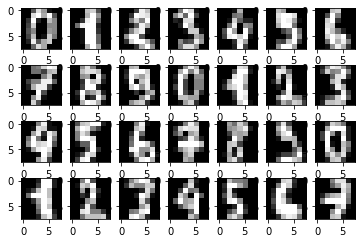

In [454]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from scipy import optimize
from sklearn.preprocessing import label_binarize


digits = load_digits()

X = digits.data
y = digits.target.reshape(-1, 1)

displayData(X)

# Training model

In [455]:
m = digits.data.shape[0]

input_layer_size = m
num_labels = 10

labels=np.unique(y)

labels=label_binarize(y, classes=labels)


_lambda = 3

all_theta = train(X, labels, num_labels, _lambda)

         Current function value: 33.576568
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 48


# Predicting for all training examples and calculating the model accuracy

In [456]:
y_predict = predict(X, all_theta)
print('train accuracy: ',np.mean(1*(y_predict==y))*100,'%')

train accuracy:  88.36950473010573 %


# Predicting for one random training example

Text(0.5, 1.0, 'predicted: 9')

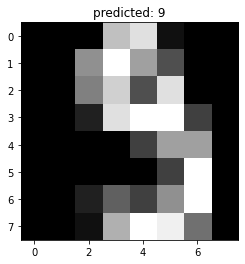

In [457]:
random = np.random.randint(m)
example = X[random].reshape(1,-1)
predicted = predict(example, all_theta).item()
plt.imshow(example.reshape(8,8))
plt.title('predicted: '+str(predicted))